In [1]:
import pandas as pd
import numpy as np

In [2]:
reldir = '../../datasets/msdchallenge/'

In [3]:
songs = pd.read_csv(reldir + 'kaggle_songs.txt', sep=' ', header=None, names=['song_id','idx'])
songs.shape

(386213, 2)

In [4]:
users = pd.read_csv(reldir + 'kaggle_users.txt',
                    header=None, 
                    names=['user_id']
                   )
users.shape

(110000, 1)

In [5]:
triplets = pd.read_csv(reldir + 'kaggle_visible_evaluation_triplets.txt', 
                       header=None, 
                       sep='\t',
                       names=['user_id', 'song_id', 'count'])
triplets.shape

(1450933, 3)

In [6]:
triplets_orig = triplets.copy()

In [7]:
triplets.describe()

,count
count,1.450933e+06
mean,3.187149e+00
std,7.051664e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,3.000000e+00
max,9.230000e+02


## Outliers

Let's define outliers as those that are more than 3 std away from the mean.

In [8]:
std = triplets.describe().iloc[2]
cut_off = std * 3

How many are outside this cutoff?

In [9]:
(triplets['count'] > int(cut_off)).sum() / triplets.shape[0]

0.01670028871078127

Drop all outside this cutoff

In [10]:
outlier_idx = triplets[triplets['count'] > int(cut_off)].index
triplets = triplets.drop(outlier_idx).reset_index(drop=True)

In [11]:
triplets.describe()

,count
count,1.426702e+06
mean,2.547130e+00
std,3.048813e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,3.000000e+00
max,2.100000e+01


<AxesSubplot:>

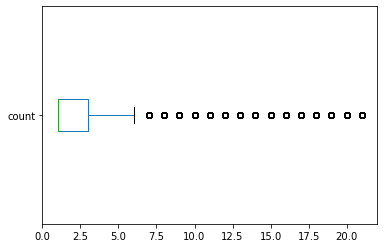

In [14]:
triplets.plot.box(vert=False)

For BPR, we want to be able to make triplets of (user, positive item, negative item).

To do this, we will only consider users that have a positive and negative item.

- Positive: count >= 3
- Negative: count < 3

In [64]:
num_records_for_user = pd.DataFrame(
    triplets.groupby(['user_id'])['song_id'].count().reset_index()
).rename({'song_id' : 'records'}, axis=1)

In [86]:
num_records_for_user[num_records_for_user['records'] > 1]

,user_id,records
0,00007a02388c208ea7176479f6ae06f8224355b3,9
1,00014a76ed063e1a749171a253bca9d9a0ff1782,11
2,00015189668691680bb1a2e58afde1541ec92ced,17
3,0001ff7aa2667c8d8b945317b88adaed1c0b9dc2,9
4,00020fcd8b01986a6a85b896ccde6c49f35142ad,32
...,...,...
109983,fffdef71f13352e9cff769f1d96f5ccf90f8955e,7
109984,fffe29116f96c97b47a5dabdd406784ad0ba6f30,6
109985,fffe5b73c50c72ca9c54947efac1fcacf59c4a17,23
109986,fffed0bee753cd78494011b8b55dafd4f5c7e5ff,12


` for each user:
    if there are two song_id's m,n such that for  `
` get each row in triplets such that triplets `

'00015189668691680bb1a2e58afde1541ec92ced'

In [121]:
users.shape

(110000, 1)

In [101]:
user = '00015189668691680bb1a2e58afde1541ec92ced'
num_records_for_user[num_records_for_user['user_id'] == user].iloc[0,1] > 1
# for _ , row in triplets[triplets['user_id'] == user].iterrows():
#     print(row['count'])

True

In [119]:
processed_users[18976]
num_records_for_user[num_records_for_user['user_id'] == processed_users[18976]].shape

(0, 2)

In [ ]:
threshold = 2
qualified_users = []
processed_users = []
# for each user
for user in users['user_id'].tolist()[10000:]:
    processed_users.append(user)
    user_record = num_records_for_user[num_records_for_user['user_id'] == user]
    # if there are more than two entries for this user
    if ( user_record.shape[0] > 0 and user_record.iloc[0,1] > 1 ):
        # search user's records to find a positive record and a negative
        temp = triplets[triplets['user_id'] == user]
        positive = False
        negative = False
        for _ , row in temp.iterrows():
            if ( row['count'] > threshold ):
                positive = True
            else :
                negative = True
            if ( positive and negative ):
                qualified_users.append(user)
                break
            
len(qualified_users)

In [120]:
len(qualified_users)

14317

In [123]:
qualified_users1 = qualified_users.copy()